<a href="https://colab.research.google.com/github/y001003/Bootcamp/blob/main/Section1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,654 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [3]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/BootCamp/Section1_Project/vgames2.csv'
df = pd.read_csv(path)

df = df.iloc[:,1:]
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [8]:
# 전처리_ Sales 값의 단위 통일(M : 삭제, K : /1000)
sales = df.loc[:,'NA_Sales':'Other_Sales']

# M, K 값 포함 index 찾아서 변환
def string_replace_float(x) :
  # find()에서 포함되어있지 않으면 -1값이 나온다.
  # if 값이 -1이 아닌경우 찾는 값이 포함되어 있다는 뜻
  if str(x).find("K") != -1 :
    x = str(x).replace("K",'')
    return float(x) / 1000

  if str(x).find("M") != -1 :
    x = str(x).replace("M",'')
    return float(x)

  return float(x)

sales['NA_Sales'] = sales['NA_Sales'].apply(string_replace_float)
sales['EU_Sales'] = sales['EU_Sales'].apply(string_replace_float)
sales['JP_Sales'] = sales['JP_Sales'].apply(string_replace_float)
sales['Other_Sales'] = sales['Other_Sales'].apply(string_replace_float)

df.loc[:,'NA_Sales':'Other_Sales'] = sales
df.dtypes

Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [9]:
# 전처리_결측값 처리
print("변경 전 결측치 \n",df.isnull().sum())

# Year 결측치는 0 : unkown으로 대체
df['Year'] = df['Year'].fillna(0)
# Genre 결측치는 Misc으로 변경
df['Genre'] = df['Genre'].fillna('Unknown')
# Publisher 결측치는 Unkown으로 대체
df['Publisher'] = df['Publisher'].fillna('Unknown')

print("변경 후 결측치 \n",df.isnull().sum())

변경 전 결측치 
 Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64
변경 후 결측치 
 Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


In [10]:
# 결측치 변경 타당성 검토
sum = df.loc[:,'NA_Sales':'Other_Sales'].sum()

# Year에 대하여
year_0 = df.loc[:,'NA_Sales':'Other_Sales'].loc[df['Year'] == 0].sum()
print("Year 0이 차지하는 정도 \n",year_0 / sum)
print("연도별 트렌드의 흐름을 파악하는데 있어서 크리티컬한 볼륨을 가진 데이터가 아니다")
print("약 1%정도의 데이터를 가지고 트렌드가 변화가 아주 유의미하다고 보기 힘들다.\n")

# Genre에 대하여
Unknown_g = df.loc[:,'NA_Sales':'Other_Sales'].loc[df['Genre'] == 'Unknown'].sum()
print("Unknown 이 차지하는 정도 \n", Unknown_g / sum)
print("지역별 가장 선호하는 장르를 파악하는 데이터 분석에 있어서 크리티컬한 볼륨을 가진 데이터가 아니다.\n")

# Publisher에 대하여
Unknown_p = df.loc[:,'NA_Sales':'Other_Sales'].loc[df['Publisher'] == 'Unknown'].sum()
print("Unknown 이 차지하는 정도 \n", Unknown_p / sum)
print("데이터 분석에 있어서 크리티컬한 볼륨을 가진 데이터가 아니다.\n")

Year 0이 차지하는 정도 
 NA_Sales       0.013563
EU_Sales       0.010291
JP_Sales       0.005360
Other_Sales    0.010968
dtype: float64
연도별 트렌드의 흐름을 파악하는데 있어서 크리티컬한 볼륨을 가진 데이터가 아니다
약 1%정도의 데이터를 가지고 트렌드가 변화가 아주 유의미하다고 보기 힘들다.

Unknown 이 차지하는 정도 
 NA_Sales       0.004692
EU_Sales       0.005390
JP_Sales       0.009977
Other_Sales    0.006945
dtype: float64
지역별 가장 선호하는 장르를 파악하는 데이터 분석에 있어서 크리티컬한 볼륨을 가진 데이터가 아니다.

Unknown 이 차지하는 정도 
 NA_Sales       0.006153
EU_Sales       0.005016
JP_Sales       0.005414
Other_Sales    0.003949
dtype: float64
데이터 분석에 있어서 크리티컬한 볼륨을 가진 데이터가 아니다.







---


문제

1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

1. 지역에 따라서 선호하는 게임 장르가 다를까

In [114]:
grouped_genre = df.loc[:,'NA_Sales':'Other_Sales'].groupby(df['Genre']).sum()
grouped_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874.81,522.16,157.90,186.45
Adventure,105.66,64.05,51.95,16.81
Fighting,223.20,101.22,87.34,36.64
Misc,408.05,212.36,105.27,74.04
Platform,446.44,201.61,130.65,51.53
Puzzle,123.35,50.73,56.87,12.52
Racing,357.19,237.10,56.40,77.10
Role-Playing,319.54,183.58,344.95,56.96
Shooter,581.92,313.05,38.28,102.65


In [142]:
# 각 지역의 장르별 Top5 나타내기
NA_top = grouped_genre['NA_Sales'].sort_values(ascending=False,inplace=False)
NA_index = NA_top.index
NA_top.reset_index(drop=True,inplace=True)# region_top_data 를 위해 top 수치데이들을 합칠 때, 서로다른 index로 인해 꼬임 방지

EU_top = grouped_genre['EU_Sales'].sort_values(ascending=False,inplace=False)
EU_index = EU_top.index
EU_top.reset_index(drop=True,inplace=True)

JP_top = grouped_genre['JP_Sales'].sort_values(ascending=False,inplace=False)
JP_index = JP_top.index
JP_top.reset_index(drop=True,inplace=True)

Other_top = grouped_genre['Other_Sales'].sort_values(ascending=False,inplace=False)
Other_index = Other_top.index
Other_top.reset_index(drop=True,inplace=True)

region_top = pd.DataFrame(data=[NA_index[0:5],EU_index[0:5],JP_index[0:5],Other_index[0:5]],index=['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],columns=['Top1','Top2','Top3','Top4','Top5'])
region_top_data = pd.DataFrame(data=[NA_top[0:5],EU_top[0:5],JP_top[0:5],Other_top[0:5]])

print(region_top)
print(region_top_data)

region_top_data = round(region_top_data)
region_top_data =region_top_data.astype(str)
region_top['Top1'] = region_top['Top1'] +"("+ region_top_data[0].str.rstrip('.0') + "M)"
region_top['Top2'] = region_top['Top2'] +"("+ region_top_data[1].str.rstrip('.0') + "M)"
region_top['Top3'] = region_top['Top3'] +"("+ region_top_data[2].str.rstrip('.0') + "M)"
region_top['Top4'] = region_top['Top4'] +"("+ region_top_data[3].str.rstrip('.0') + "M)"
region_top['Top5'] = region_top['Top5'] +"("+ region_top_data[4].str.rstrip('.0') + "M)"
print(region_top)

print("\n데이터 분석 :지역에 따라서 선호하는 게임 장르가 다를까\n")
print("미국과 유럽은 액션과 스포츠게임 순으로 대체적으로 비슷한 장르를 선호하는 것으로 보였으나")
print("일본은 다른 지역에 비해 롤플레이잉 장르의 선호도가 1순위일 정도로 높았다. 이후 순위는 액션, 스포츠 순으로 다른 지역과 비슷한 경향을 보였다.")

                     Top1    Top2     Top3      Top4  Top5
NA_Sales           Action  Sports  Shooter  Platform  Misc
EU_Sales           Action  Sports  Shooter    Racing  Misc
JP_Sales     Role-Playing  Action   Sports  Platform  Misc
Other_Sales        Action  Sports  Shooter    Racing  Misc
                  0       1       2       3       4
NA_Sales     874.81  680.52  581.92  446.44  408.05
EU_Sales     522.16  376.48  313.05  237.10  212.36
JP_Sales     344.95  157.90  135.37  130.65  105.27
Other_Sales  186.45  134.67  102.65   77.10   74.04

데이터 분석 :지역에 따라서 선호하는 게임 장르가 다를까

미국과 유럽은 액션과 스포츠게임 순으로 대체적으로 비슷한 장르를 선호하는 것으로 보였으나
일본은 다른 지역에 비해 롤플레이잉 장르의 선호도가 1순위일 정도로 높았다. 이후 순위는 액션, 스포츠 순으로 다른 지역과 비슷한 경향을 보였다.


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44033 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

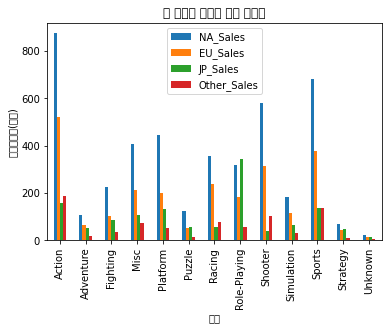

In [12]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

grouped_genre.plot(kind="bar")

plt.title("각 국가의 장르별 게임 판매량")
plt.xlabel("장르")
plt.ylabel("누적판매량(백만)")
plt.show()

2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

연도별 게임 트렌드는 '연도별 가장 잘 팔린 게임 플랫폼과 게임 장르'를 확인한다.


In [242]:
df['World_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
year_trend = df['World_Sales'].groupby([df['Year']]).sum()

# pd.set_option('display.max_rows', 500)
years = year_trend[year_trend > year_trend.sum() * (1/1000) ] # Year데이터가 정확하게 분류되지 않음으로, 트렌드 계산에 있어서 0.1% 이하 년도 값을 지운다.

# 연도 데이터 10 과 11은 각각 17.91 과 11.52로 0.1%보다 높지만 데이터 효율상 제거한다
years = years[(years.index != 10) & (years.index != 11) & (years.index != 0) ]

df = df[df['Year'].isin(years.index)]

year_trend_p = df['World_Sales'].groupby([df['Year'],df['Platform']]).sum()
year_trend_p_g = df['World_Sales'].groupby([df['Year'],df['Genre']]).sum()


World_Sales                     ...                             
Platform        2600   3DO    3DS    DC  ...   WiiU    X360     XB   XOne
Year                                     ...                             
1980.0         11.38   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1981.0         35.68   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1982.0         28.88   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1983.0          5.84   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1984.0          0.27   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1985.0          0.45   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1986.0          0.67   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1987.0          1.94   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1988.0          0.74   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1989.0          0.63   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1990.0           NaN   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1991.0           NaN   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1992.0           NaN   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1993.0           NaN   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1994.0           NaN  0.02    NaN   NaN  ...    NaN     NaN    NaN    NaN
1995.0           NaN  0.08    NaN   NaN  ...    NaN     NaN    NaN    NaN
1996.0           NaN   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1997.0           NaN   NaN    NaN   NaN  ...    NaN     NaN    NaN    NaN
1998.0           NaN   NaN    NaN  3.38  ...    NaN     NaN    NaN    NaN
1999.0           NaN   NaN    NaN  5.16  ...    NaN     NaN    NaN    NaN
2000.0           NaN   NaN    NaN  5.99  ...    NaN     NaN   0.99    NaN
2001.0           NaN   NaN    NaN  1.07  ...    NaN     NaN  22.26    NaN
2002.0           NaN   NaN    NaN  0.29  ...    NaN     NaN  48.00    NaN
2003.0           NaN   NaN    NaN   NaN  ...    NaN     NaN  54.57    NaN
2004.0           NaN   NaN    NaN   NaN  ...    NaN     NaN  64.88    NaN
2005.0           NaN   NaN    NaN   NaN  ...    NaN    8.31  49.03    NaN
2006.0           NaN   NaN    NaN   NaN  ...    NaN   51.94  10.04    NaN
2007.0           NaN   NaN    NaN  0.02  ...    NaN   95.75   0.55    NaN
2008.0           NaN   NaN    NaN  0.04  ...    NaN  135.16   0.18    NaN
2009.0           NaN   NaN    NaN   NaN  ...    NaN  120.92    NaN    NaN
2010.0           NaN   NaN    NaN   NaN  ...    NaN  170.95    NaN    NaN
2011.0           NaN   NaN  62.33   NaN  ...    NaN  134.74    NaN    NaN
2012.0           NaN   NaN  51.10   NaN  ...  17.79  100.82    NaN    NaN
2013.0           NaN   NaN  55.67   NaN  ...  21.81   89.56    NaN  18.61
2014.0           NaN   NaN  43.12   NaN  ...  22.54   36.43    NaN  52.44
2015.0           NaN   NaN  26.82   NaN  ...  16.37   13.02    NaN  57.67
2016.0           NaN   NaN   6.54   NaN  ...   3.28    0.83    NaN  12.38

[37 rows x 31 columns]

In [246]:
df_trend_p = pd.DataFrame(year_trend_p)
df_trend_p = pd.pivot_table(df_trend_p,columns='Platform',index='Year',values='World_Sales')

df_trend_p_g = pd.DataFrame(year_trend_p_g)
df_trend_p_g = pd.pivot_table(df_trend_p_g,columns='Genre',index='Year',values='World_Sales')

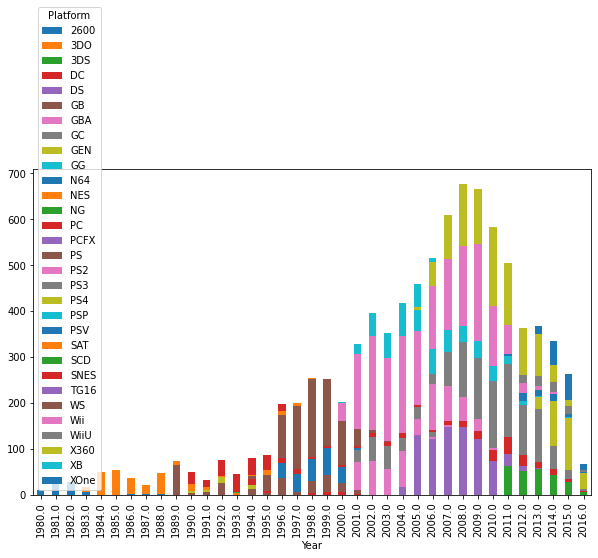

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]
df_trend_p.plot.bar(stacked=True)
